In [1]:
import cv2
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [3]:
# 建立卷積核：高通濾波器
temp = np.array([ [-1, -1, -1],
                  [-1,  8, -1],
                  [-1, -1, -1] ], dtype='float32')

# 轉成 tf.nn.conv2d 所須格式
kernal = tf.reshape(tf.Variable(temp), [3, 3, 1, 1])
print(kernal) 

Tensor("Reshape_1:0", shape=(3, 3, 1, 1), dtype=float32)


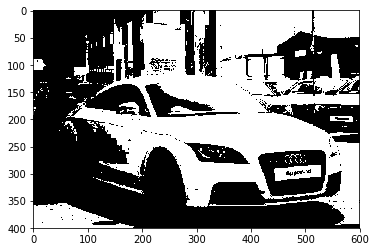

In [14]:
# 載入灰階影像，並二值化
I1 = cv2.imread('C:/Users/USER/Desktop/00001.JPG', 0)
_, I2 = cv2.threshold(I1, 0, 255, cv2.THRESH_OTSU)

# 轉 uint8 格式成 float32
I2 = I2.astype('float32')

# 轉換成卷積輸入模式
x_img = tf.reshape(I2, [-1, I2.shape[0], I2.shape[1], 1])

plt.imshow(I2, cmap='gray')
plt.show()


In [7]:
I2.shape

(3024, 4032)

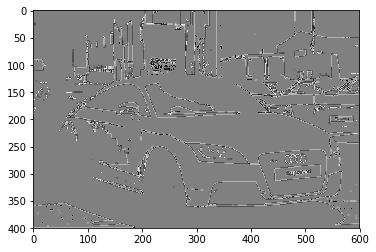

In [15]:
# 卷積運算子
y_conv = tf.nn.conv2d(x_img, kernal, strides=[1, 1, 1, 1], padding='SAME')

# 啟動計算圖
with tf.Session() as sess:
    
    # 變數需要初始化
    sess.run( tf.global_variables_initializer() )
    
    # 執行運算子
    result = sess.run(y_conv)
    
    # 展示結果
    I3 = tf.reshape(result, [I2.shape[0], I2.shape[1]])
    I3 = I3.eval()
    
    plt.imshow(I3, cmap='gray')
    plt.show()